### **Least Squares Curve Fitting**

**Work the following problems:**
* C0
* Problem set 3.2, p. 141:  Problems 3, 5, 7, 8, 10, 13 (harmonic), 14 (exponential), 16 (exponential)
* S1 and S2


**C0.** Write a Python function that creates the least squares equations to be solved using the formula ${H^T}H\,a\, = {H^T}y$ . You can use a Numpy function to solve the equations. Also, write another function that will plot the data points used for the fit and the curve fit.

**You must not copy the code in the textbook or from anywhere else. Doing so will be considered cheating.**

You can check your code by solving examples 3.10 (p. 136) and 3.11 in the textbook and confirming that you obtain the same final answers. **You should use the functions you write here to do the problems in this assignment.**

In [166]:
# Problem C0 is the setup to be used in the next problems

import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi, log, exp, dot

#combined least squares and plotting
def LeastSquaresAndPlot(x, y, mG, calculateValues):

    if (type(mG) == int): #passed in an integer
        # Create H
        m = mG
        n = len(x)
        H = np.zeros((n, m+1)) #5 x 2, where 2 is the degree + 1

        for j in range(m+1):
            for i in range(n):
                H[i, j]= x[i]**j #actually fills in H matrix

        HTH = H.T @ H
        HTy = H.T @ y
        
        coefficients = np.linalg.solve(HTH, HTy)

        x_vals = np.linspace(x[0], x[-1:], 100)
        y_vals = np.zeros_like(x_vals)  

        for i in range(len(x_vals)):
            summ = 0
            for j in range(m + 1):
                summ += x_vals[i]**j*coefficients[j]
            y_vals[i] = summ

        plt.title("Least Squares Fit")
        plt.scatter(x, y)
        plt.plot(x_vals, y_vals)
        plt.show()

    else: #passed as a function
        G = mG
        n = len(x)
        m = len(G(x[0]))
        H = np.zeros([n,m])

        for i in range(n):
            H[i,:] = G(x[i])
        
        HTH = H.T @ H
        HTy = H.T @ y
        
        coefficients = np.linalg.solve(HTH, HTy)

        # plotting broken for some reason I'm over it
        x_vals = np.linspace(x[0], x[-1:], 100)
        y_vals = np.zeros_like(x_vals)

        for i in range(len(x_vals)):
            Gx = G(x_vals[i])
            yi = dot(coefficients, Gx)
            y_vals[i] = yi

        plt.title("Least Squares Fit")
        plt.scatter(x, y)
        plt.plot(x_vals, y_vals)
        plt.show()

    #performs additional calculations if necessary 
    if (len(calculateValues) != 0):
        calculatedValues = []
        for value in calculateValues:
            summ = 0
            for j in range(m + 1):
                summ += value**j*coefficients[j]
            calculatedValues.append(summ)
        return coefficients, calculatedValues

    return coefficients

**Problem 3.** Comments/modifications:

* “Linear regression” means to fit the data with a linear function.
* Nobody (i.e., no engineer) uses “units of strain” mm/m. Instead, multiply the given strains by 0.001 (for example, use .00212, not 2.12).
* Plot the data and the curve fit using the actual strain.
* By materials science convention, strain should be on the x-axis.
* Do not average the strains for each stress. You should have 12 points.


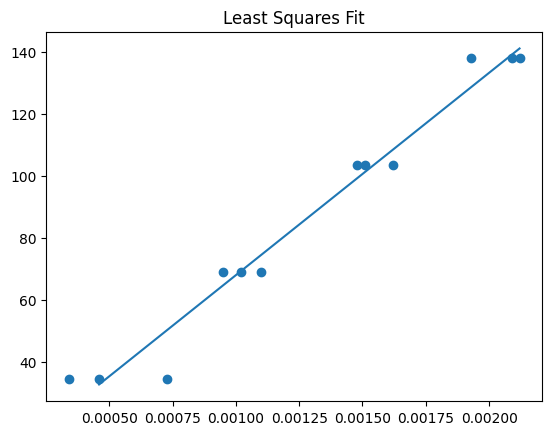

The modulus of elasticity is 65302.09703803894 MPa.


In [167]:
# Problem 3
#calculate modulus of elasticity

stress = np.array([34.5, 69.0, 103.5, 138.0, 34.5, 69.0, 103.5, 138.0, 34.5, 69.0, 103.5, 138.0]) #3 of each x value
allstrain = np.array([.46, .95, 1.48, 1.93, .34, 1.02, 1.51, 2.09, .73, 1.10, 1.62, 2.12]) #combine all strains into one list
allstrain *= .001 #correction

m = 1 #linear regression

coefficients = LeastSquaresAndPlot(allstrain, stress, m, [])

print(f"The modulus of elasticity is {coefficients[1]} MPa.")

**Problem 5.** Comments/modifications:

* Be sure to plot your fit and the data points.


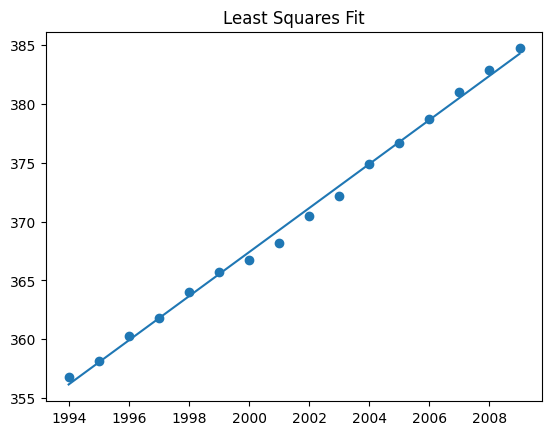

The average increase in concentration per year is 1.8722058823473455 ppm/year.


In [168]:
# Problem 5

m = 1 #avg increase in concentration per year (linear fit)

allyears = np.array([i + 1994 for i in range(2009-1994 + 1)])
allppm = np.array([356.8, 358.2, 360.3, 361.8, 364.0, 365.7, 366.7, 368.2, 370.5, 372.2, 374.9, 376.7, 378.7, 381.0, 382.9, 384.7])

coefficients = LeastSquaresAndPlot(allyears, allppm, m, [])

print(f"The average increase in concentration per year is {coefficients[1]} ppm/year.")

**Problem 7.** Be sure you plot the data and your fit.

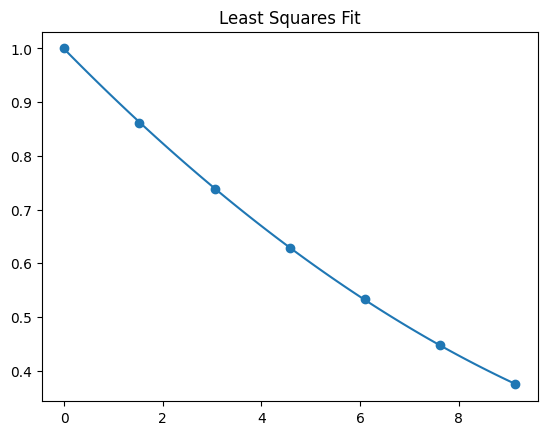

The relative air density at 10.5 km = 0.32234242971039645


In [169]:
# Problem 7

m = 2 #quadratic fit

altitude = np.array([0, 1.525, 3.050, 4.575, 6.10, 7.625, 9.150])
density = np.array([1, .8617, .7385, .6292, .5328, .4481, .3741])

coefficients, densities = LeastSquaresAndPlot(altitude, density, m, [10.5])

print(f"The relative air density at 10.5 km = {densities[0]}")

**Problem 8.** Be sure you plot the data and your fit.

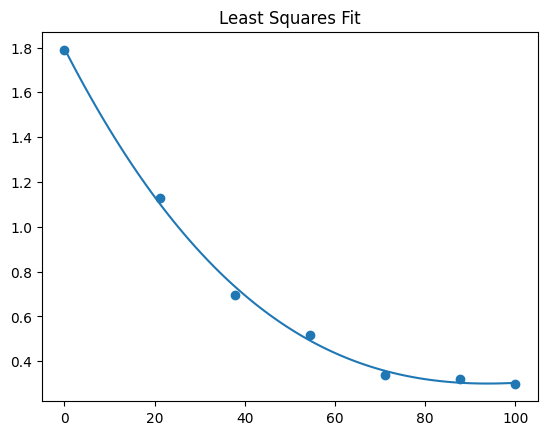

The estimated viscocity at 10 degrees C = 1.4345071783718422 10^-3m^2/s.
The estimated viscocity at 30 degrees C = 0.8889438745121662 10^-3m^2/s.
The estimated viscocity at 60 degrees C = 0.4365697400923958 10^-3m^2/s.
The estimated viscocity at 90 degrees C = 0.3015529833900418 10^-3m^2/s.


In [170]:
# Problem 8

m = 3 #cubic fit
temperature = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])
viscosity = np.array([1.79, 1.13, .696, .519, .338, .321, .296])

temperatures = [10, 30, 60, 90]
coefficients, viscosities = LeastSquaresAndPlot(temperature, viscosity, m, temperatures)

for i in range(len(temperatures)):
    print(f"The estimated viscocity at {temperatures[i]} degrees C = {viscosities[i]} 10^-3m^2/s.")

**Problem 10.** Comments/modifications:

* Also calculate the predicted efficiency for the year 2000 if the first data point is deleted.
* Be sure to plot the data and your fits.

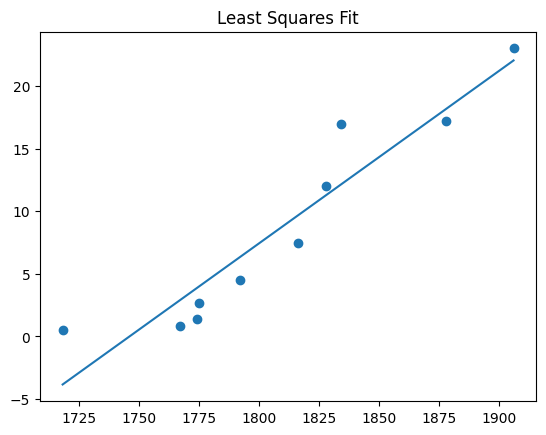

The predicted efficiency for the year 2000 WITH the year 1718 is 34.98612444304064%.


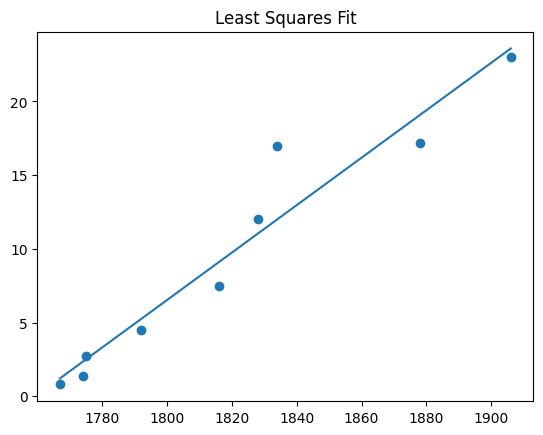

The predicted efficiency for the year 2000 WITHOUT the year 1718 is 38.73313984481666%.


In [171]:
# Problem 10

m = 1 #linear
years = np.array([1718, 1767, 1774, 1775, 1792, 1816, 1828, 1834, 1878, 1906])
efficiency = np.array([.5, .8, 1.4, 2.7, 4.5, 7.5, 12.0, 17.0, 17.2, 23.0])

coefficients, calculatedEfficiency = LeastSquaresAndPlot(years, efficiency, m, [2000])
print(f"The predicted efficiency for the year 2000 WITH the year 1718 is {calculatedEfficiency[0]}%.")

coefficients, calculatedEfficiency = LeastSquaresAndPlot(years[1:], efficiency[1:], m, [2000])
print(f"The predicted efficiency for the year 2000 WITHOUT the year 1718 is {calculatedEfficiency[0]}%.")

**Problem 13.** You do not need to plot anything for this one, but it may help you see whether your coefficients are correct.

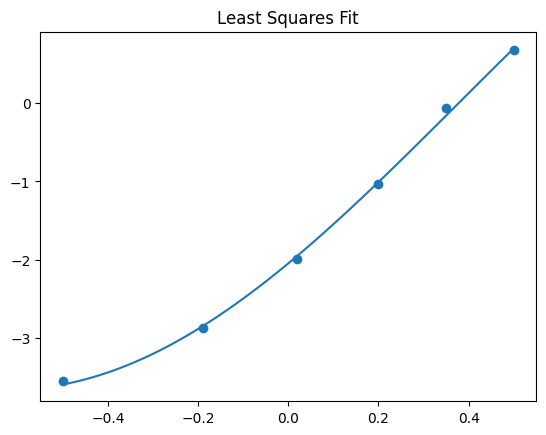

The coefficients of a and b are 3.0384905309506665 and -2.0495596632192283 respectively.


In [172]:
# Problem 13

def G(x): 
    return np.array([sin(x * (pi/ 2)), cos(x * (pi/ 2))], dtype = object)

x = np.array([-.5, -.19, .02, .2, .35, .5])
y = np.array([-3.558, -2.874, -1.995, -1.040, -.068, .677]) 

coefficients = LeastSquaresAndPlot(x, y, G, [])

print(f"The coefficients of a and b are {coefficients[0]} and {coefficients[1]} respectively.")

**Problem 14.** You do not need to plot anything for this one, but it may help you see whether your coefficients are correct.

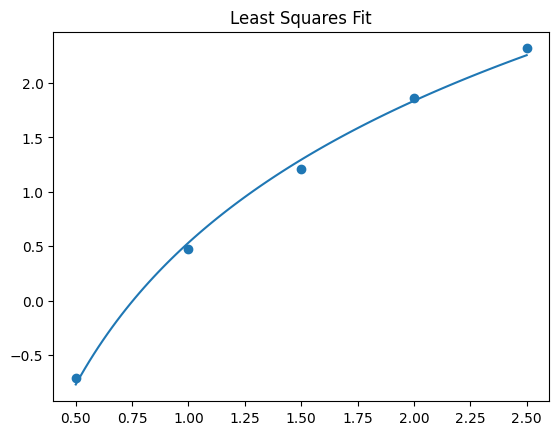

The coefficients of a and b are 1.7031397871561755 and 1.8817501813721562 respectively.
Ignore the graph above, the curve fit is innacurate due to the way I've programmed it. 


In [177]:
# Problem 14

def G(x):
    return np.array([1, log(x)], dtype = object)

#I can say something like c = ln(a), and solve for c rather than a
#when I solve for c, I know that a = e^c 

x = np.array([.5, 1.0, 1.5, 2, 2.5])
y = np.array([.49, 1.6, 3.36, 6.44, 10.16])

#need the log(y) in addition to the exp(c)
coefficients = LeastSquaresAndPlot(x, log(y), G, [])

c = coefficients[0]
b = coefficients[1]
a = exp(c)

print(f"The coefficients of a and b are {a} and {b} respectively.")
print(f"Ignore the graph above, it is innacurate.")

**Problem 16.** Comments:
* You do not need to plot anything for this one, but it may help you see whether your answer is correct.
* Note that the half-life is the amount of time it takes for the intensity of radiation $\gamma$ to be halved.

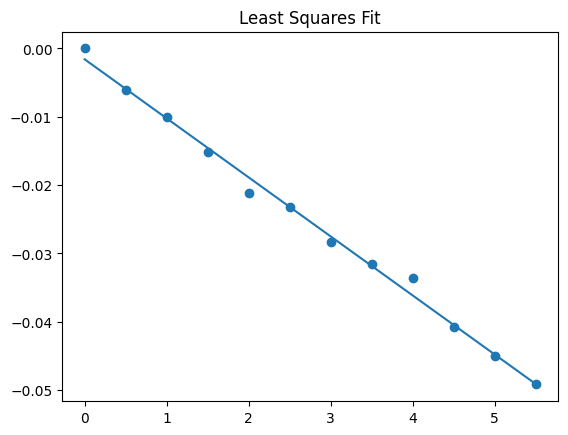

The coefficients of a and b are 0.9984157812833949 and -0.008639549701453631 respectively.
Ignore the graph above, it is innacurate.
The half life of the substance is 80.41306312075936 seconds.


In [180]:
# Problem 16
#half life of 
# y(t) = a * e**-bt

def G(x):
    return np.array([1.0, x], dtype = object)

years = np.array(np.arange(0, 5.51, .5))
intensity = np.array([1.000, .994, .99, .985, .979, .977, .972, .969, .967, .96, .956, .952])
intensity = log(intensity)

coefficients = LeastSquaresAndPlot(years, intensity, G, [])

c = coefficients[0]
b = coefficients[1]
a = exp(c)

print(f"The coefficients of a and b are {a} and {b} respectively.")
print(f"Ignore the graph above, it is innacurate.")
print(f"The half life of the substance is {log(1/2*a)/b} years.")

#### **Some shorter questions**

**S1** Given the data points:   
xData = [0,2,3,4],  yData = [4,7,6,7]

By hand, calculate the “H” matrix that will be used for the least squares fit using a quadratic polynomial.

In [175]:
# No code required, but feel free to test the fit here to see if it makes sense.

**S2** Assume you wish to fit data from S1 using a cubic polynomial. The data ranges from $x=0$ to $x=10$. In addition to fitting the data in a least squares sense, the curve fit must also have a zero slope at $x=0$. How will you perform the least squares fit?

In [176]:
# No code required, but you may try what you describe & see how the fit changes.